#### Distribution of sequence lengths after split_libraries_fastq.py and removal of any sequences with adapters

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
files = !ls ~/emp/metadata-sequences/*_filtered_seqs.length.txt

In [3]:
# fastaSizeDist.pl on study 1883 ran out of memory so I ran on first 1% of seqs only
# no need to subset list of files now...
#files = files[0:56] + files[57:]

In [4]:
df = pd.DataFrame()
for path in files:
    df_single = pd.read_csv(path, header=None)
    x = re.match('/Users/luke.thompson/emp/metadata-sequences/([0-9]*)_filtered_seqs.length.txt', path)
    study = x.groups()[0]
    df_single.columns = [study]
    df = pd.concat([df, df_single.describe()], axis=1)

In [5]:
df.to_csv('~/emp/metadata-sequences/length_filtered_seqs_adaptor_cleanup.csv', index_label='study_id')

In [6]:
df

,1001,1024,1030,1031,1033,1034,1035,1036,1037,1038,...,895,905,910,925,933,940,945,958,963,990
count,428891.0,1748559.0,2.759098e+07,1.835733e+06,1.357128e+06,1.145258e+07,1.940081e+07,1.356474e+07,4.394206e+06,3.808519e+06,...,257569.000000,4.646697e+06,4.108408e+06,6.288561e+06,6.108392e+07,9.699086e+06,5.914723e+07,4.507585e+06,1.301667e+07,9.736478e+07
mean,151.0,151.0,9.710053e+01,9.706472e+01,9.744952e+01,9.850946e+01,9.646700e+01,9.685766e+01,9.703890e+01,9.694813e+01,...,147.937799,1.489229e+02,1.499534e+02,8.808240e+01,9.803802e+01,9.934798e+01,1.471374e+02,1.483690e+02,9.948682e+01,1.485324e+02
std,0.0,0.0,5.201202e+00,5.172705e+00,4.882912e+00,4.014423e+00,5.424851e+00,5.408512e+00,5.265942e+00,5.305672e+00,...,7.176171,6.281878e+00,4.341778e+00,4.760352e+00,5.268941e+00,2.485887e+00,6.175203e+00,7.735735e+00,2.191143e+00,6.283632e+00
min,151.0,151.0,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,...,114.000000,1.140000e+02,1.140000e+02,6.900000e+01,7.600000e+01,7.600000e+01,1.140000e+02,1.140000e+02,7.600000e+01,1.140000e+02
25%,151.0,151.0,9.500000e+01,9.500000e+01,9.600000e+01,1.000000e+02,9.400000e+01,9.500000e+01,9.500000e+01,9.500000e+01,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
50%,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
75%,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02
max,151.0,151.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,151.000000,1.510000e+02,1.510000e+02,9.000000e+01,1.000000e+02,1.000000e+02,1.500000e+02,1.510000e+02,1.000000e+02,1.510000e+02


sequence length after adaptor clean-up -- 97 EMP studies


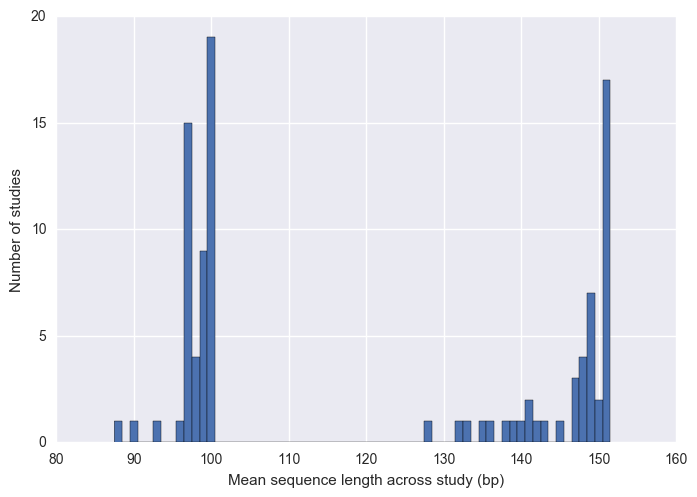

In [11]:
print('sequence length after adaptor clean-up -- %s EMP studies' % df.shape[1])
plt.hist(df.loc['mean'].round(), bins=np.arange(df.loc['mean'].round().min()-0.5,df.loc['mean'].round().max()+1.5,1))
plt.xlabel('Mean sequence length across study (bp)')
plt.ylabel('Number of studies')
plt.savefig('~/emp/metadata-sequences/length_filtered_seqs_adaptor_cleanup.pdf')

In [8]:
df.loc['mean'].round().value_counts()

100.0    19
151.0    17
97.0     15
99.0      9
149.0     7
148.0     4
98.0      4
147.0     3
141.0     2
150.0     2
143.0     1
142.0     1
136.0     1
93.0      1
96.0      1
140.0     1
138.0     1
139.0     1
132.0     1
135.0     1
145.0     1
133.0     1
90.0      1
128.0     1
88.0      1
Name: mean, dtype: int64

In [9]:
df.loc['mean'].sort_values()

925      88.082396
1521     89.736965
722      92.976260
1035     96.467001
809      96.642166
1039     96.826429
1197     96.843103
1036     96.857657
808      96.932615
1038     96.948130
1037     97.038903
1198     97.042973
1031     97.064720
659      97.090063
1030     97.100534
632      97.106928
1043     97.116647
776      97.418646
1033     97.449524
1526     97.902565
933      98.038015
810      98.252545
638      98.441390
1034     98.509456
1242     98.529283
1453     98.605672
940      99.347975
2338     99.396296
1580     99.413475
829      99.426845
           ...    
2382    147.881448
895     147.937799
1041    148.082015
958     148.368984
990     148.532418
864     148.710431
1056    148.826728
905     148.922896
807     149.052759
2192    149.276185
861     149.311391
1673    149.709934
910     149.953413
2182    150.993359
1717    150.998259
1711    150.998369
1674    150.998417
1715    150.998434
1713    150.998527
1716    150.998528
1714    150.998573
1024    151.